In [50]:
import numpy as np
import pandas as pd
import datetime, json
import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from time import time
%matplotlib inline

In [92]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
def get_pos_neg_weights(data, as_array=False):
    test_set_pos_label_ratio = 0.1746
    m_pos_ratio = sum(data)/float(len(data))
    weight = {
        0: (1-test_set_pos_label_ratio) / (1-m_pos_ratio),
        1: test_set_pos_label_ratio/m_pos_ratio
    }
    
    if not as_array:
        return weight
    else:
        return np.array([weight[v] for v in data])

In [108]:
#feature data

df = pd.read_csv('final_features.csv')
df = df.replace(np.inf, 0)
X_features = df[['len_q1',
 'len_q2',
  'len_ratio',
  'diff_len_ratio',
  'len_word_q1',
 'len_word_q2',
  'len_word_ratio',
  'diff_len_word_ratio',
 'common_words',
  'common_words_ratio',
  'cosine_distance',
 'cityblock_distance',
  'jaccard_distance',
  'canberra_distance',
 'euclidean_distance',
  'minkowski_distance',
  'braycurtis_distance',
 'skew_q1vec',
  'skew_q2vec',
  'kur_q1vec',
  'kur_q2vec',
 'fuzz_Qratio',
  'fuzz_WRatio',
  'fuzz_partial_ratio',
 'fuzz_partial_token_set_ratio',
  'fuzz_partial_token_sort_ratio',
 'fuzz_token_set_ratio',
  'fuzz_token_sort_ratio',
  'pos_diff',
 'pos_symmetric_diff',
  'unique_q1',
  'unique_q2',
  'unique_ratio_q1',
 'unique_ratio_q2',
  'match_share']]

y_features = df['is_duplicate']
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_features, 
                                                                        y_features, 
                                                                        test_size = TEST_SPLIT, 
                                                                        random_state=RNG_SEED)
print(X_train_feat.shape)
print(y_train_feat.shape)

(363770, 35)
(363770,)


In [113]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train_feat_scaled = scale.fit_transform(X_train_feat.as_matrix())
X_test_feat_scaled = scale.fit_transform(X_test_feat.as_matrix())

Normalized confusion matrix
             precision    recall  f1-score   support

          0       0.85      0.61      0.71     25607
          1       0.55      0.81      0.65     14812

avg / total       0.74      0.68      0.69     40419



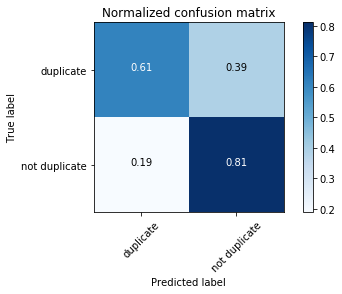

In [115]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report


lr = LogisticRegression(penalty='l1', 
                        C=0.1, 
                        intercept_scaling=1, 
                        class_weight='balanced',
                        random_state=8787, 
                        solver='liblinear', 
                        max_iter=100, 
                        multi_class='ovr')

lr.fit(X_train_feat_scaled, y_train_feat)

preds = lr.predict(X_test_feat_scaled)
cnf_matrix = confusion_matrix(y_test_feat, preds)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['duplicate','not duplicate'], normalize=True,
                      title='Normalized confusion matrix')

print (classification_report(y_test_feat,preds ))


In [156]:
error = [i==j for i, j in zip(y_test_feat, preds) ] 
 

correct_class = [i for i, x in enumerate(error) if x]
wrong_class = [i for i, x in enumerate(error) if not x]


In [157]:
df.iloc[X_test_feat.iloc[correct_class].index][['question1','question2','is_duplicate']]

,question1,question2,is_duplicate
161303,How can I download Tor browser?,How do I download the Tor browser?,1
126718,What languages should a programmer learn?,What language should a programmer learn?,1
10670,Is it okay to work as an IT consultant in a pr...,What are some video games that despite very co...,0
268227,Any Java libraries for debugging and disassemb...,Is there any mobile application identified fak...,0
114578,What graphics card would be recommended if at ...,What is the most beautiful and graphic demandi...,0
213175,How do I calculate the voltage at node X for t...,Oil & petroleum courses?,0
294390,What is your weirdest fetish?,What is your most unusual fetish?,1
106767,"What is the diference between rationalism, rea...",What is the Classical Realism theory?,0
181404,House of Cards Season 2: What is the significa...,How did House of Cards Season 2 compare to Sea...,0
1066,Trading opportunities in srilanka?,What should I do to finding a job in finance f...,0


In [158]:
df.iloc[X_test_feat.iloc[wrong_class].index][['question1','question2','is_duplicate']]

,question1,question2,is_duplicate
331755,Are aphrodisiac foods fact or fiction?,What are aphrodisiac foods?,0
120061,What might be the business plan in launching r...,What is the revenue model of Reliance Jio?,1
13217,What is dialogue writing?,What is 2+2 dialogue?,0
32097,Who painted this?,Who painted this painting? When was it painted?,0
340547,What is the father name of PR?,What is your father's name?,0
135554,What age do you think is too late to start med...,What age is too old to get a medical MD?,1
326840,What is the worst thing you've done lately?,What is the worst thing that you have done?,0
68318,What is a good diet to lose weight?,How could I gain weight in a healthy way?,0
161731,Why are blue and red neon lights illegal or re...,Why are blue and red neon lights illegal or re...,0
96056,What are the best resources when applying for ...,What are the best resources when applying for ...,0


In [85]:
from sklearn import grid_search, cross_validation

class_wt = get_pos_neg_weights(y_train_feat)

print(class_wt.values())
gs = grid_search.GridSearchCV(
                estimator=LogisticRegression(),
                param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
                cv=cross_validation.KFold(n=len(X_train_feat_scaled), n_folds=10))

gs.fit(X_train_feat_scaled, y_train_feat)

[1.3092566617102641, 0.47244614205910579]


GridSearchCV(cv=sklearn.cross_validation.KFold(n=363770, n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

             precision    recall  f1-score   support

          0       0.76      0.77      0.76     25607
          1       0.59      0.58      0.59     14812

avg / total       0.70      0.70      0.70     40419

Normalized confusion matrix


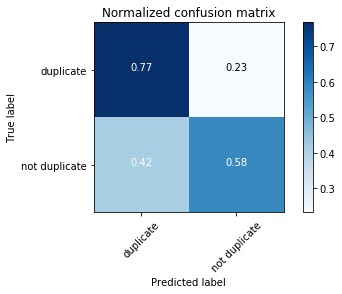

In [93]:
yhat = gs.predict(X_test_feat_scaled)

print (classification_report(y_test_feat,yhat ))

cnf_matrix = confusion_matrix(y_test_feat, yhat)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['duplicate','not duplicate'], normalize=True,
                      title='Normalized confusion matrix')
